In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
import sklearn
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

pd.set_option('display.max_columns', None)
sns.set(rc={'figure.figsize':(8,4)})

# Part A: Data Cleaning

1) We will increase the complexity of our model slightly by increasing the number of features. Keep the following features:

- T_degC (water temperature)
- Salnty (salinity of water)
- STheta (density of water)
- O2ml_L (milliliters of dissolved oxygen per liter of water)
- Depthm (depth in meters)

In [2]:
df = pd.read_csv('bottle.csv')

C:\Users\58386\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df = df[['T_degC','Salnty', 'STheta','O2ml_L','Depthm']]

In [4]:
df.head()

,T_degC,Salnty,STheta,O2ml_L,Depthm
0,10.50,33.440,25.649,NaN,0
1,10.46,33.440,25.656,NaN,8
2,10.46,33.437,25.654,NaN,10
3,10.45,33.420,25.643,NaN,19
4,10.45,33.421,25.643,NaN,20


2) Remove NaN / NA values from dataset (prior to building train/test sets) (same as HW #1):
- Shape of your data should be: (661268, 5)


In [5]:
df = df.dropna()
df.shape

(661268, 5)

3) Remove any STheta outliers (same as HW #1).
- Shape of your data should be: (661268, 5)
- Note: Outliers for STheta might have been removed due to NAs in new features. Be sure to verify this on your own.

C:\Users\58386\AppData\Local\Temp/ipykernel_19224/2588158861.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


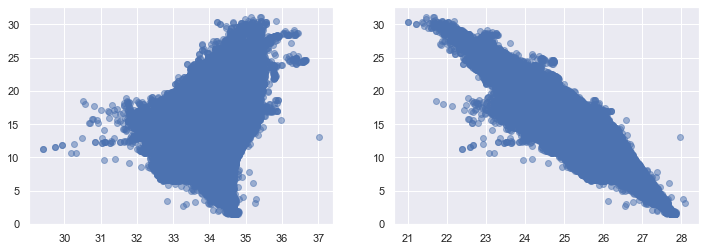

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

ax[0].scatter(df.Salnty, df.T_degC, alpha=0.5)

ax[1].scatter(df.STheta, df.T_degC, alpha=0.5)

fig.show()

In [7]:
df = df[df['STheta']<200]
df.shape

# Outliers for STheta have been removed due to NAs in new features. 

(661268, 5)

# Part B: Train / Test Split & Scaling

1) Create X & y objects:

- X object should be all 4 predictors. Shape should be: (661268, 4)

- y object should be just your target variable (T_degC): Shape should be: (661268, 1)

Hint for y: You will need to specify the shape you want. Trying converting y to a numpy array, and then using the .reshape() method.

In [8]:
X,y=df.drop(['T_degC'],axis=1),df['T_degC']

In [9]:
y.shape

(661268,)

2) Generate X_train, X_test, y_train & y_test. Use 80% for train & 20% for test.

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)

 3) Scale all features to improve convergence in Gradient Descent. It is highly encouraged that you review the appropriate method of handling scaling with train & test data.

Additional info on scaling with train & test sets: https://stats.stackexchange.com/questions/174823/how-to-apply-standardization-normalization-to-train-and-testset-if-prediction-i (Links to an external site.)

The easiest approach is to use the sklearn tool "StandardScaler" - more info here: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html (Links to an external site.)

You should create two new X objects:
- X_train_scaled
- X_test_scaled.

Note: X_test_scaled must use the scaling parameters learned from training data.

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)

In [12]:
X_train_scaled

array([[-0.74540261, -0.63854348,  1.29855184, -0.67728002],
       [ 0.51244708,  0.78685534, -0.55823535,  0.09669652],
       [-0.2392213 ,  0.03800092,  0.02684603, -0.3047436 ],
       ...,
       [-0.43039708, -0.0303469 ,  0.08487063, -0.46531964],
       [ 0.46465313,  0.77298767, -0.43735077,  0.09669652],
       [-0.89312935, -0.47510303,  0.73764738, -0.47816573]])

In [13]:
scaler = StandardScaler() 
scaler.fit(X_test)
X_test_scaled = scaler.fit_transform(X_test)

In [14]:
X_test_scaled

array([[-0.74609439, -0.97622802,  1.17715695, -0.69982041],
       [ 0.85886281,  0.9804599 , -1.49343737,  0.51539716],
       [-1.28035619, -0.1107699 ,  0.71837492, -0.22275887],
       ...,
       [ 0.04661112, -0.01273746, -0.25714054, -0.25821615],
       [-1.58657942, -1.41885934,  1.32203548, -0.69982041],
       [-1.01539709, -0.55538168,  0.86808274, -0.42260898]])

# Part C: Linear Regression with sklearn

1) Create an instance of the LinearRegression class called "lin_reg". Fit lin_reg using X_train_scaled & y_train.

In [15]:
# fit model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

2) Print out the coefficients (including the intercept)

In [16]:
lin_reg.intercept_

10.914783098367892

In [17]:
lin_reg.coef_

array([ 1.63043136, -4.63255939,  0.30116055, -0.47546539])

3) Predict T_degC for the test data using lin_reg. Make sure to use X_test_scaled!

- Call predictions y_pred_sklearn

In [18]:
y_pred_sklearn = lin_reg.predict(X_test_scaled)

In [19]:
y_pred_sklearn

array([14.90801529,  7.07824331,  9.66265867, ..., 11.09511863,
       15.63180974, 12.29445467])

4) Calculate the following for the test data:

- mean squared error
- r-squared
- explained variance

In [20]:
# model evaluation

# test
test_mse = MSE(y_test, y_pred_sklearn)
print(f"Test set RMSE:", test_mse)


Test set RMSE: 0.1103908924082949


In [21]:
# r-squared
r2=sklearn.metrics.r2_score(y_test, y_pred_sklearn, sample_weight=None, multioutput='uniform_average')
print(f"R2:", r2)

R2: 0.9938179693604139


In [22]:
# explained variance
ev= sklearn.metrics.explained_variance_score(y_test, y_pred_sklearn, sample_weight=None, multioutput='uniform_average')
print(f"explained variance:", ev)

explained variance: 0.993828764772263


5) Create a scatterplot that shows actual versus predicted values for the T_degC.



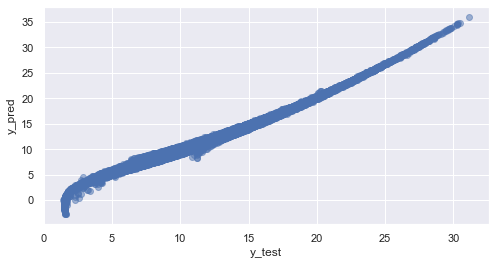

In [23]:
plt.scatter(y_test, y_pred_sklearn, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

# Part D: Gradient Descent Mini-Batch

Please make sure you are using Mini-Batch! Perform the following six steps for mini-batch sizes of: 50, 250, & 2000. Save all outputs

1) Similar to HW #1, you will need to add a column of 1s to X_train_scaled and X_test_scaled.

2) The cost function we will use for Gradient Descent is MSE (refer to Equation 4-3 in Hands-On Machine Learning Chapter 4).

Note: The Hands-on ML Github will be a helpful resource for solving Mini-Batch, but it does include a changing eta through using the learning_schedule function. Do not use a changing eta for this assignment, rather just use a static eta. This means you will need to make changes to the Github example for Mini-Batch.

3) Feel free to use any value for eta and epochs, but 0.1 eta and 100 epochs should work fine for this HW.

4) Calculate the following for the test data:

- mean squared error
- r-squared
- explained variance

5) Create a scatterplot that shows actual versus predicted values for the T_degC for the test data.

6) Given we are estimating parameters through gradient descent we also want to check how our error metrics look for training data. Calculate the following for the training data:

- mean squared error
- r-squared
- explained variance

In [24]:
X_train_scaled  = np.c_[np.ones((len(X_train_scaled), 1)), X_train_scaled]  # include an intercept value of 1 for every observation in your X_train.
X_test_scaled  = np.c_[np.ones((len(X_test_scaled), 1)), X_test_scaled]  # include an intercept value of 1 for every observation in your X_train.

In [25]:
X_train_scaled

array([[ 1.        , -0.74540261, -0.63854348,  1.29855184, -0.67728002],
       [ 1.        ,  0.51244708,  0.78685534, -0.55823535,  0.09669652],
       [ 1.        , -0.2392213 ,  0.03800092,  0.02684603, -0.3047436 ],
       ...,
       [ 1.        , -0.43039708, -0.0303469 ,  0.08487063, -0.46531964],
       [ 1.        ,  0.46465313,  0.77298767, -0.43735077,  0.09669652],
       [ 1.        , -0.89312935, -0.47510303,  0.73764738, -0.47816573]])

In [26]:
def mini_batch_gradient_descent(X_b, y, n_epochs, minibatch_size, eta):
    m = len(X_b)

    np.random.seed(1)
    theta = np.random.randn(5,1) 
    
    for epoch in range(n_epochs):
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X_b[shuffled_indices]
        
        y = np.array(y)
        y_shuffled = y[shuffled_indices]
        y_shuffled = np.asarray(y_shuffled).reshape((len(y_shuffled),1))
        for i in range(0, m, minibatch_size):
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]
            derived_cost_function = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - eta * derived_cost_function
    return(theta)

In [27]:
theta_50  = mini_batch_gradient_descent(X_train_scaled,y_train,100,50,0.1)
theta_250  = mini_batch_gradient_descent(X_train_scaled,y_train,100,250,0.1)
theta_2000  = mini_batch_gradient_descent(X_train_scaled,y_train,100,2000,0.1)

In [28]:
print(theta_50)

print(theta_250)

print(theta_2000)


[[10.91528358]
 [ 1.67650173]
 [-4.65459373]
 [ 0.32867742]
 [-0.48001081]]
[[10.91653416]
 [ 1.62541101]
 [-4.62444492]
 [ 0.32349356]
 [-0.45836046]]
[[10.91405201]
 [ 1.61442497]
 [-4.62199025]
 [ 0.30816658]
 [-0.46216644]]


In [29]:
def compare_three(y_test,y_pred,y_train,y_pred_train):
    test_mse = MSE(y_test, y_pred)
    train_mse = MSE(y_train, y_pred_train)
    print(f"Test set MSE:", test_mse)
    print(f"Train set MSE:", train_mse)

    test_r2=sklearn.metrics.r2_score(y_test, y_pred, sample_weight=None, multioutput='uniform_average')
    train_r2=sklearn.metrics.r2_score(y_train, y_pred_train, sample_weight=None, multioutput='uniform_average')

    print(f"Test set R2:", test_r2)
    print(f"Train set R2:", train_r2)

    test_ev= sklearn.metrics.explained_variance_score(y_test, y_pred, sample_weight=None, multioutput='uniform_average')
    train_ev= sklearn.metrics.explained_variance_score(y_train, y_pred_train, sample_weight=None, multioutput='uniform_average')

    print(f"Test set explained variance:", test_ev)
    print(f"Train set explained variance:", train_ev)

Test set MSE: 0.11125567288909351
Train set MSE: 0.11179616027430388
Test set R2: 0.9937695405515495
Train set R2: 0.9937348199950844
Test set explained variance: 0.9937795717057335
Train set explained variance: 0.9937348340324942


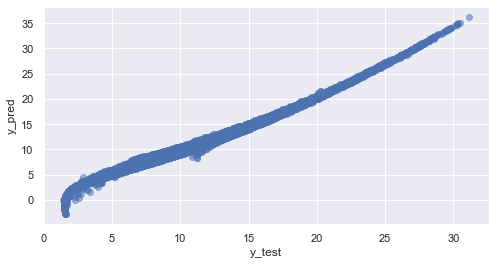

In [30]:
y_pred = X_test_scaled.dot(theta_50)
y_pred_train = X_train_scaled.dot(theta_50)
compare_three(y_test,y_pred,y_train,y_pred_train)

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

Test set MSE: 0.11058582738169574
Train set MSE: 0.11113000823547252
Test set R2: 0.9938070527535091
Train set R2: 0.9937721518893433
Test set explained variance: 0.9938152968658467
Train set explained variance: 0.9937723237230565


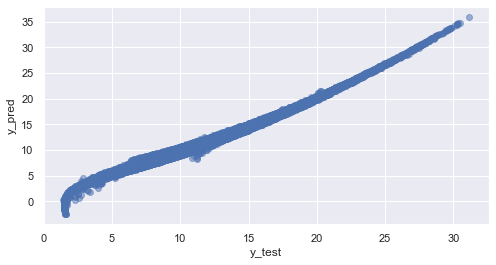

In [31]:
y_pred = X_test_scaled.dot(theta_250)
y_pred_train = X_train_scaled.dot(theta_250)
compare_three(y_test,y_pred,y_train,y_pred_train)

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

Test set MSE: 0.11063054446353796
Train set MSE: 0.11104861483562319
Test set R2: 0.9938045485399456
Train set R2: 0.9937767132651546
Test set explained variance: 0.9938165107727194
Train set explained variance: 0.993776743218516


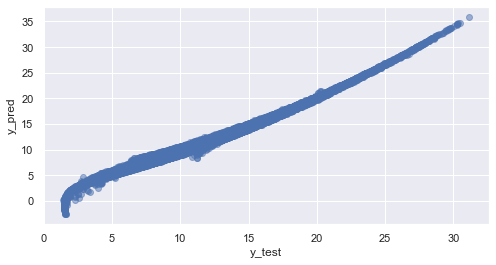

In [32]:
y_pred = X_test_scaled.dot(theta_2000)
y_pred_train = X_train_scaled.dot(theta_2000)
compare_three(y_test,y_pred,y_train,y_pred_train)

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

# Part E: Conceptual Questions

### 1) Describe how parameter estimation in Gradient Descent differs from using the normal equation.


Normal equation only has one solution and it use mathematically equation. Normal equation performs minimization without iteration. On the other hand,Gradient descent is an optimization algorithm used to find the values of parameters of a function that minimizes a cost function. We use gradient descent to update the parameters of the model. Parameters refer to coefficients in Linear Regression and weights in neural networks. 

### 2) We used Mini-Batch Gradient descent here, but there are a variety of options for Gradient Descent. How is Mini-Batch Gradient Descent different from Stochastic Gradient Descent?


Stochastic – compute gradient using one random training data instance at a time

Mini-batch – compute gradient using small random sets of training data instances called mini-batches



### 3) Identify your best-performing version of Gradient Descent and compare the error metrics for test data vs training data. Does this version of gradient descent show signs of overfitting? Explain

theta_250 is the best-performning version of Gradient Descent.

Test set MSE: 0.11058582738169574
Train set MSE: 0.11113000823547252
Test set R2: 0.9938070527535091
Train set R2: 0.9937721518893433
Test set explained variance: 0.9938152968658467
Train set explained variance: 0.9937723237230565

The test set RMSE is slightly lower than Train set RMSE means that it does not have an overfitting problem

### 4) Explain what the learning rate is for. Even though we did not, why might it be helpful to change the learning rate over time?

The learning rate is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated. A too small learnning rate may result in a long training process that could get stuck, whereas a too large learning rate may result in learning a sub-optimal set of weights too fast or an unstable training process.Therefore adapting learning rates can accelerate training and alleviate some of the pressure of choosing a learning rate and learning rate schedule.At the beginning, the model should take big steps. but if the model is near to its miminum point, it should take small steps

### 5) Why would a data scientist want to use early stopping in gradient descent?

It is a method for regularization that involves ending model training before training loss finishes decreasing. In early stopping, you end model training when the loss on a validation data set starts to increase, that is, when generalization performance worsens.